In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import radians, sin, cos, sqrt, atan2

In [2]:
file_path = r'C:\Users\ahounsounon\Documents\paie_agent\selected_data_with_noise.csv'
data = pd.read_csv(file_path)

In [3]:
data.head(40)

0           1 source             datetime  new_latitude  \
0   39.984702  116.318417    Luc  2008-10-23 02:53:04     39.984702   
1   39.984683  116.318450    Luc  2008-10-23 02:53:10     40.036859   
2   39.984686  116.318417    Luc  2008-10-23 02:53:15     40.018104   
3   39.984688  116.318385    Luc  2008-10-23 02:53:20     40.000596   
4   39.984655  116.318263    Luc  2008-10-23 02:53:25     39.995847   
5   39.984611  116.318026    Luc  2008-10-23 02:53:30     39.999118   
6   39.984608  116.317761    Luc  2008-10-23 02:53:35     39.987851   
7   39.984563  116.317517    Luc  2008-10-23 02:53:40     39.985803   
8   39.984539  116.317294    Luc  2008-10-23 02:53:45     40.007226   
9   39.984606  116.317065    Luc  2008-10-23 02:53:50     40.001785   
10  39.984568  116.316911    Luc  2008-10-23 02:53:55     39.988782   
11  39.984586  116.316716    Luc  2008-10-23 02:54:00     40.013090   
12  39.984561  116.316527    Luc  2008-10-23 02:54:05     39.985183   
13  39.984536  116.316354    Luc  2008-10-23 02:54:10     39.987005   
14  39.984523  116.316188    Luc  2008-10-23 02:54:15     40.028331   
15  39.984516  116.315963    Luc  2008-10-23 02:54:20     39.986573   
16  39.984523  116.315823    Luc  2008-10-23 02:54:25     39.995072   
17  39.984574  116.315611    Luc  2008-10-23 02:54:30     39.985280   
18  39.984568  116.315407    Luc  2008-10-23 02:54:35     39.996882   
19  39.984538  116.315148    Luc  2008-10-23 02:54:40     40.010522   
20  39.984501  116.314907    Luc  2008-10-23 02:54:45     39.999136   
21  39.984532  116.314808    Luc  2008-10-23 02:54:50     39.992675   
22  39.984504  116.314625    Luc  2008-10-23 02:54:55     39.987507   
23  39.984485  116.314426    Luc  2008-10-23 02:55:00     39.992095   
24  39.984427  116.314240    Luc  2008-10-23 02:55:05     39.985421   
25  39.984485  116.314042    Luc  2008-10-23 02:55:10     39.995293   
26  39.984480  116.313818    Luc  2008-10-23 02:55:15     40.000290   
27  39.984501  116.313659    Luc  2008-10-23 02:55:20     39.998205   
28  39.984618  116.314323    Luc  2008-10-23 02:55:25     39.996353   
29  39.984649  116.314107    Luc  2008-10-23 02:55:30     39.991443   
30  39.984621  116.313941    Luc  2008-10-23 02:55:35     39.984913   
31  39.984655  116.313724    Luc  2008-10-23 02:55:40     39.984733   
32  39.984681  116.313521    Luc  2008-10-23 02:55:45     39.989583   
33  39.984708  116.313311    Luc  2008-10-23 02:55:50     39.988971   
34  39.984708  116.313099    Luc  2008-10-23 02:55:55     40.001947   
35  39.984696  116.312921    Luc  2008-10-23 02:56:00     40.009628   
36  39.984677  116.312746    Luc  2008-10-23 02:56:05     39.996251   
37  39.984682  116.312525    Luc  2008-10-23 02:56:10     39.988453   
38  39.984649  116.312332    Luc  2008-10-23 02:56:15     40.027094   
39  39.984641  116.312123    Luc  2008-10-23 02:56:20     39.996252   

    new_longitude  distance_km  
0      116.318417     0.000000  
1      116.336612     0.003517  
2      116.326129     0.002831  
3      116.305328     0.002735  
4      116.318367     0.011023  
5      116.300825     0.020777  
6      116.320954     0.022580  
7      116.248550     0.021382  
8      116.353020     0.019186  
9      116.309131     0.020885  
10     116.314638     0.013784  
11     116.337283     0.016734  
12     116.305341     0.016341  
13     116.310959     0.014999  
14     116.318717     0.014217  
15     116.313059     0.019186  
16     116.330586     0.011953  
17     116.275243     0.018932  
18     116.329570     0.017393  
19     116.299692     0.022317  
20     116.315277     0.020941  
21     116.334538     0.009112  
22     116.327057     0.015899  
23     116.318100     0.017086  
24     116.319913     0.017109  
25     116.332530     0.018060  
26     116.325676     0.019093  
27     116.353770     0.013747  
28     116.315438     0.058049  
29     116.334770     0.018723  
30     116.337100     0.014482  
31     116.277796     0.018871  
32     116.

In [4]:
data

0           1  source             datetime  new_latitude  \
0     39.984702  116.318417     Luc  2008-10-23 02:53:04     39.984702   
1     39.984683  116.318450     Luc  2008-10-23 02:53:10     40.036859   
2     39.984686  116.318417     Luc  2008-10-23 02:53:15     40.018104   
3     39.984688  116.318385     Luc  2008-10-23 02:53:20     40.000596   
4     39.984655  116.318263     Luc  2008-10-23 02:53:25     39.995847   
...         ...         ...     ...                  ...           ...   
1312  40.080960  116.475527  Prince  2009-09-19 07:35:32     40.090798   
1313  40.081947  116.475482  Prince  2009-09-19 07:35:37     40.082370   
1314  40.082980  116.475450  Prince  2009-09-19 07:35:42     40.108571   
1315  40.084032  116.475407  Prince  2009-09-19 07:35:47     40.086791   
1316  40.085130  116.475378  Prince  2009-09-19 07:35:52     40.105805   

      new_longitude  distance_km  
0        116.318417     0.000000  
1        116.336612     0.003517  
2        116.326129     0.002831  
3        116.305328     0.002735  
4        116.318367     0.011023  
...             ...          ...  
1312     116.480995     0.111032  
1313     116.485122     0.109783  
1314     116.470924     0.114929  
1315     116.482009     0.117002  
1316     116.466408     0.122149  

[1317 rows x 7 columns]

In [5]:
source='Luc'
subset = data[data['source'] == source]
subset

0           1 source             datetime  new_latitude  \
0    39.984702  116.318417    Luc  2008-10-23 02:53:04     39.984702   
1    39.984683  116.318450    Luc  2008-10-23 02:53:10     40.036859   
2    39.984686  116.318417    Luc  2008-10-23 02:53:15     40.018104   
3    39.984688  116.318385    Luc  2008-10-23 02:53:20     40.000596   
4    39.984655  116.318263    Luc  2008-10-23 02:53:25     39.995847   
..         ...         ...    ...                  ...           ...   
295  39.990698  116.310105    Luc  2008-10-23 04:20:37     40.000094   
296  39.990698  116.310103    Luc  2008-10-23 04:20:42     39.995045   
297  39.990696  116.310101    Luc  2008-10-23 04:20:47     40.007262   
298  39.990695  116.310095    Luc  2008-10-23 04:20:52     40.006463   
299  39.990692  116.310092    Luc  2008-10-23 04:20:57     39.993701   

     new_longitude  distance_km  
0       116.318417     0.000000  
1       116.336612     0.003517  
2       116.326129     0.002831  
3       116.305328     0.002735  
4       116.318367     0.011023  
..             ...          ...  
295     116.313957     0.000557  
296     116.318116     0.000170  
297     116.313763     0.000280  
298     116.254358     0.000523  
299     116.307370     0.000420  

[300 rows x 7 columns]

In [6]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

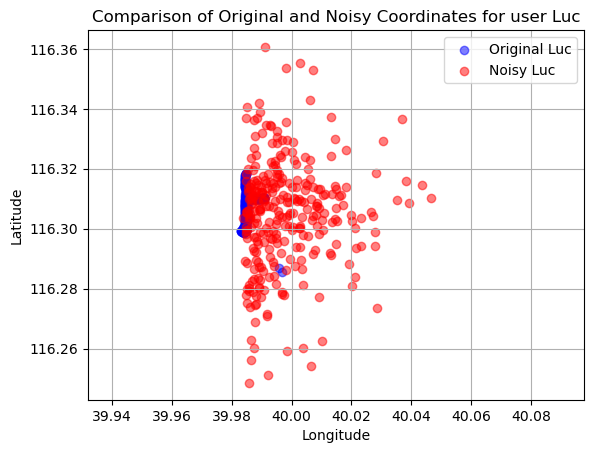

In [7]:
plt.scatter(subset['0'], subset['1'], color='blue', label=f'Original {source}', alpha=0.5)

# Tracer les coordonnées bruitées
plt.scatter(subset['new_latitude'], subset['new_longitude'], color='red', label=f'Noisy {source}', alpha=0.5)

# Ajouter des titres et des labels
plt.title(f'Comparison of Original and Noisy Coordinates for user {source}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.axis('equal') 
plt.show()

In [8]:



# Calculer la moyenne des valeurs réelles
mean_true = subset['1'].mean()
mean_br= subset['new_longitude'].mean()

# Calculer la somme des carrés des résidus (SS_res) et la somme des carrés totaux (SS_tot)
SS_res = np.sum((subset['1'] -subset['new_longitude']) ** 2)  # Erreur au carré
SS_tot = np.sum((subset['1'] - mean_true) ** 2)  # Variance totale

# Calculer R²
R_squared = 1 - (SS_res / SS_tot)
print(f"Coefficient de détermination R^2 : {R_squared:.4f}")


Coefficient de détermination R^2 : -7.4483


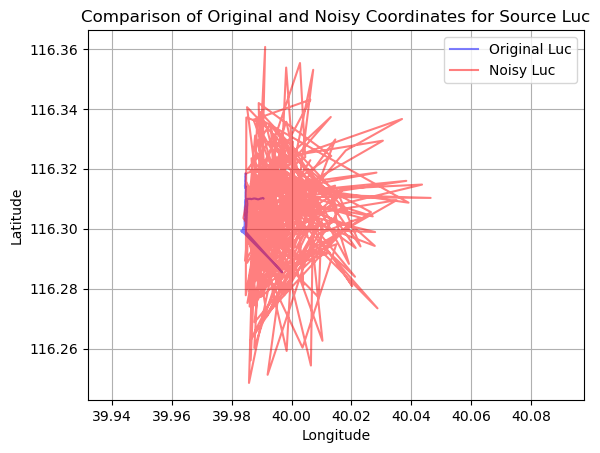

In [9]:

plt.plot(subset['0'], subset['1'], color='blue', label=f'Original {source}', alpha=0.5)

# Tracer les coordonnées bruitées
plt.plot(subset['new_latitude'], subset['new_longitude'], color='red', label=f'Noisy {source}', alpha=0.5)
# Ajouter des titres et des labels
plt.title(f'Comparison of Original and Noisy Coordinates for Source {source}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.axis('equal')  # Pour garder les proportions des axes
plt.show()

In [10]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# Calculer la MAE, RMSE, Erreur relative, et Distance moyenne
def evaluate_noise(subset):
    # Erreur absolue moyenne (MAE)
    mae_lat = np.mean(np.abs(subset['0'] - subset['new_latitude']))
    mae_lon = np.mean(np.abs(subset['1'] - subset['new_longitude']))
    
    # Erreur quadratique moyenne (RMSE)
    rmse_lat = np.sqrt(np.mean((subset['0'] - subset['new_latitude'])**2))
    rmse_lon = np.sqrt(np.mean((subset['1'] - subset['new_longitude'])**2))
    
    # Erreur relative moyenne
    relative_lat = np.mean(np.abs(subset['0'] - subset['new_latitude']) / np.abs(subset['0']))
    relative_lon = np.mean(np.abs(subset['1'] - subset['new_longitude']) / np.abs(subset['1']))
    
    # Distance haversine moyenne entre les coordonnées originales et bruitées
    distances = [haversine(subset.iloc[i, 0], subset.iloc[i, 1], subset['new_latitude'].iloc[i], subset['new_longitude'].iloc[i]) for i in range(len(subset))]
    mean_distance = np.mean(distances)
    
    return mae_lat, mae_lon, rmse_lat, rmse_lon, relative_lat, relative_lon, mean_distance

# Appliquer l'évaluation sur le DataFrame 'subset'
mae_lat, mae_lon, rmse_lat, rmse_lon, relative_lat, relative_lon, mean_distance = evaluate_noise(subset)

# Afficher les résultats
print(source)
print(f"Erreur Absolue Moyenne (Latitude): {mae_lat}")
print(f"Erreur Absolue Moyenne (Longitude): {mae_lon}")
print(f"Erreur Quadratique Moyenne (Latitude): {rmse_lat}")
print(f"Erreur Quadratique Moyenne (Longitude): {rmse_lon}")
print(f"Erreur Relative Moyenne (Latitude): {relative_lat}")
print(f"Erreur Relative Moyenne (Longitude): {relative_lon}")
print(f"Distance Moyenne (Haversine): {mean_distance} km")

Luc
Erreur Absolue Moyenne (Latitude): 0.012703839214113562
Erreur Absolue Moyenne (Longitude): 0.012013757628639989
Erreur Quadratique Moyenne (Latitude): 0.017438971002703613
Erreur Quadratique Moyenne (Longitude): 0.016831292919590884
Erreur Relative Moyenne (Latitude): 0.00031771207355321245
Erreur Relative Moyenne (Longitude): 0.00010329466267224072
Distance Moyenne (Haversine): 2.0094996692451845 km
